# Job Attrition Prediction Model

Data source:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

About Dataset
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

## Importing required libraries

In [2]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans


> Ignoring any kind of unwanted warings in while analysing dataset.


In [3]:
warnings.filterwarnings('ignore')

## Studying Data Labels 

In [4]:
jAttr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
jAttr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
jAttr_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


## Checking and removing unnecessary features

In [6]:
jAttr_data['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

***- From above observations it can be concluded that the EmployeeCount column has only one value and hence is a insignificant column for prediction purpose and needs to be dropped.***

In [7]:
jAttr_data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

***- A similar thing can be observed in the column of Over18. Which indicates all the employees are Over 18 years of age and hence the column need not to be considered for model training purpose.***

***- Employee Number has nothing to do with the Attrition hence it can be safely dropped.***

In [8]:
jAttr_data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

***- This value can also be droped as entire column has same value***

In [9]:
jAttr_data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
jAttr_data.dtypes.sort_values()

Age                          int64
YearsInCurrentRole           int64
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
TotalWorkingYears            int64
StockOptionLevel             int64
RelationshipSatisfaction     int64
PerformanceRating            int64
PercentSalaryHike            int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
EnvironmentSatisfaction      int64
Education                    int64
DistanceFromHome             int64
DailyRate                    int64
JobSatisfaction              int64
JobRole                     object
OverTime                    object
Gender                      object
EducationField              object
Department                  object
BusinessTravel      

## Checking the distribution of Target variable-'Attrition' 

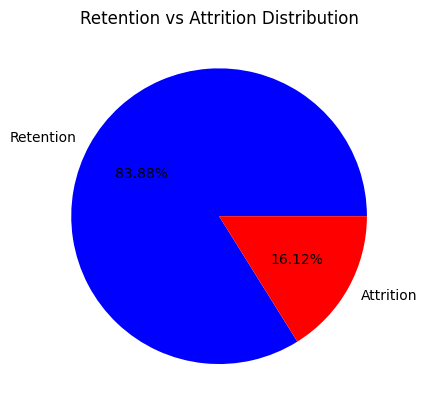

In [10]:
attrition_counts = jAttr_data['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
plt.pie(attrition_counts, labels=labels, autopct='%1.2f%%',colors=['blue','red'])
plt.title('Retention vs Attrition Distribution')
plt.show()

## Splitting Training and Testing data

In [11]:
# define prediction target (Y-variable)
y = jAttr_data.Attrition
# define features (i.e. a list of both numerical and transformed categorical variables)
X = jAttr_data.drop(['Attrition'], axis=1)

# split data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

print("Data is split into training and validation sub-datasets")

Data is split into training and validation sub-datasets


In [12]:
X_train.shape, y_train.shape

((1029, 30), (1029,))

In [13]:
X_test.shape, y_test.shape

((441, 30), (441,))

In [14]:
X_train.dtypes.sort_values()

Age                          int64
YearsInCurrentRole           int64
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
TotalWorkingYears            int64
StockOptionLevel             int64
RelationshipSatisfaction     int64
PerformanceRating            int64
PercentSalaryHike            int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
EnvironmentSatisfaction      int64
Education                    int64
DistanceFromHome             int64
DailyRate                    int64
JobSatisfaction              int64
JobRole                     object
OverTime                    object
Gender                      object
EducationField              object
Department                  object
BusinessTravel      

## Categorical variables encoding

In [15]:
# extract the names of numerical variables X_train DataFrame
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
print("Numerical features: ")
for i in numerical_features:
    print(i)
print("Count: ", len(numerical_features))

Numerical features: 
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Count:  23


In [16]:
# Extract the names of categorical variables from the X_train DataFrame
categorical_features = [col for col in X_train.columns if X_train[col].dtype == "object"]
print("Categorical features: ")
for i in categorical_features:
    print(i,jAttr_data[i].value_counts())
    print()
print('Count: ', len(categorical_features))

Categorical features: 
BusinessTravel BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtyp

In [17]:
#encode binary features

y_train = y_train.replace({'No': 0, 'Yes': 1}) 
y_valid = y_test.replace({'No': 0, 'Yes': 1}) 

gender_dictionary = {"Male": 1, "Female": 0}
X_train['Gender'] = [gender_dictionary[g] for g in X_train['Gender']]
X_test['Gender'] = [gender_dictionary[g] for g in X_test['Gender']]

over_time_dictionary = {"Yes": 1, "No": 0}
X_train['OverTime'] = [over_time_dictionary[o] for o in X_train['OverTime']]
X_test['OverTime'] = [over_time_dictionary[o] for o in X_test['OverTime']]



In [18]:
# encode ordinal feature 
business_travel_dictionary = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
X_train['BusinessTravel'] = [business_travel_dictionary[b] for b in X_train['BusinessTravel']]
X_test['BusinessTravel'] = [business_travel_dictionary[b] for b in X_test['BusinessTravel']]

marital_status_dictionary = {"Single": 0, "Married": 1, "Divorced": 2}
X_train['MaritalStatus'] = [marital_status_dictionary[b] for b in X_train['MaritalStatus']]
X_test['MaritalStatus'] = [marital_status_dictionary[b] for b in X_test['MaritalStatus']]

In [19]:
X_train.dtypes.sort_values()

Age                          int64
YearsInCurrentRole           int64
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
TotalWorkingYears            int64
StockOptionLevel             int64
RelationshipSatisfaction     int64
PerformanceRating            int64
PercentSalaryHike            int64
OverTime                     int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
MaritalStatus                int64
JobSatisfaction              int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
Gender                       int64
EnvironmentSatisfaction      int64
Education                    int64
DistanceFromHome             int64
DailyRate                    int64
BusinessTravel               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobRole                     object
EducationField      

In [25]:
department_dictionary = {"Research & Development": 0, "Sales": 1, "Human Resources": 2}
X_train['Department'] = [department_dictionary[b] for b in X_train['Department']]
X_test['Department'] = [department_dictionary[b] for b in X_test['Department']]

In [26]:
print(X_train['JobRole'].value_counts())
# X_train['EducationFeild'].value_counts()
X_train['Department'].value_counts()

JobRole
Sales Executive              228
Research Scientist           222
Laboratory Technician        175
Manufacturing Director        94
Healthcare Representative     87
Manager                       70
Research Director             59
Sales Representative          56
Human Resources               38
Name: count, dtype: int64


Department
0    674
1    308
2     47
Name: count, dtype: int64

In [20]:
# X_train.hist(bins=50,figsize=(20,20))

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, error_score='raise', train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

ValueError: 
All the 10830 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2166 fits failed with the following error:
Traceback (most recent call last):
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Life Sciences'

--------------------------------------------------------------------------------
8664 fits failed with the following error:
Traceback (most recent call last):
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\PBL_sem_4\empAttritionPBLenv\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Marketing'
